In [9]:
# !pip3 install pandas
# !pip3 install pytz
import pandas as pd
import pytz  # we just need this for assigning the timezones later

In this blog post I will be summarising some of the more useful datetime functions in pandas.

In my current job, I often find myself dealing with time series datasets which require various datetime transformations. Initially I found myself spending a lot of time jumping around the [datetime](https://docs.python.org/3/library/datetime.html) and [pandas](https://pandas.pydata.org/docs/user_guide/index.html) documentation trying to find out how to perform some of these transformations which took up a lot of time. With that in mind, this blog post aims to provide code which you can lift into your own scripts or notebooks when working with datetimes in pandas.

This post will be split into two sections. In section 1, I will simply summarise some of the functions I find myself using most often with a simple sample dataset I created. The code in this section can act as a quick copy \& paste for you if you are just looking to find out how to perform a particular datetime transformation.

In the section 2, I will show how the code snippets from section 1 can be pulled together and used in a real world example on the [Emergency - 911 Calls dataset](https://www.kaggle.com/mchirico/montcoalert).

Before we get stuck into things, it's worth pointing out that really most important thing to remember when working with datetimes in pandas is that using `.dt` opens up access to most of the datetime functions in python (and even some extra ones). This will become clearer as we work through the examples below.

# Useful snippets 

## The dataset 

The dataset I will use in this section will be a simple dataset I created which tracks the time between users logging into a website and them purchasing something on the site.

In this dataset, `session_start_date_time` tacks when the user logged into the site, `sale_date_time` tracks when the time the user purchased something on the website, and `sale_value` denotes the value of the sale (for this example the currency doesn't matter).

In [35]:
import pandas as pd
import pytz  # we just need this for assigning the timezones later

time_data = pd.read_csv("sample_data.csv")
time_data.head()

,session_start_date_time,sale_date_time,sale_value
0,2019-01-01T04:44:00,2019-01-01T05:17:00,37.166667
1,2019-01-01T05:12:00,2019-01-01T05:33:00,37.766667
2,2019-01-01T05:23:00,2019-01-01T05:42:00,33.533333
3,2019-01-01T05:35:00,2019-01-01T05:44:00,43.000000
4,2019-01-01T05:23:00,2019-01-01T05:54:00,26.233333


## Convert timestamps to datetimes

Before we can get started with datetime transformations, we must first convert our timestamp columns to datetime objects. To convert timestamps into a datetime object we can simply use the `pd.to_datetime(<YOUR_COLUMN>)` function.

It's worth noting that this step is very important when dealing with timestamps in pandas as without converting them to datetimes, all the nice datetime functionality within pandas will not be available.

In [36]:
time_data["session_start_date_time"] = pd.to_datetime(time_data["session_start_date_time"])
time_data["sale_date_time"] = pd.to_datetime(time_data["sale_date_time"])
time_data.head()

,session_start_date_time,sale_date_time,sale_value
0,2019-01-01 04:44:00,2019-01-01 05:17:00,37.166667
1,2019-01-01 05:12:00,2019-01-01 05:33:00,37.766667
2,2019-01-01 05:23:00,2019-01-01 05:42:00,33.533333
3,2019-01-01 05:35:00,2019-01-01 05:44:00,43.000000
4,2019-01-01 05:23:00,2019-01-01 05:54:00,26.233333


## Subtracting datetimes 

Once we have converted our timestamps to datetimes, we can very easily determine the `time_to_sale` for each session by subtracting `session_start_date_time` from the `sale_date_time`.

This operation creates a column of [timedeltas](https://docs.python.org/3/library/datetime.html#datetime.timedelta) which denote the difference in terms of days, hours, minutes, and seconds between the two datetimes.

In [42]:
time_data["time_to_sale"] = time_data["sale_date_time"] - time_data["session_start_date_time"]
time_data.head()

,session_start_date_time,sale_date_time,sale_value,time_to_sale
0,2019-01-01 04:44:00,2019-01-01 05:17:00,37.166667,0 days 00:33:00
1,2019-01-01 05:12:00,2019-01-01 05:33:00,37.766667,0 days 00:21:00
2,2019-01-01 05:23:00,2019-01-01 05:42:00,33.533333,0 days 00:19:00
3,2019-01-01 05:35:00,2019-01-01 05:44:00,43.000000,0 days 00:09:00
4,2019-01-01 05:23:00,2019-01-01 05:54:00,26.233333,0 days 00:31:00


In [5]:
time_data = time_data.drop("time_to_sale", axis=1)

## Timezones 

### Assigning a timezone 

Oftentimes I find myself producing outputs for people in different parts of the world. As a result of this it is important to be able to present any time related data outputs (such as visualisations) in the end users timezone, especially when they don't come from a technical background.

The first step in being able to perform any timezone conversions is to localise the data to the timezone it came from. Now typically if you are storing data in a database, it will be in UTC ISO format, so the `pd.to_dateime()` function will infer the timezone from it when converting to a datetime. However, in our case we don't have any timezone information for these timestamps, so we can go ahead and localise it to UTC using the `tz_localize()` function. 

This function will accept a timezone object (in this case we pass a [pytz](https://pypi.org/project/pytz/) timezone) and will localise the column to that timezone.

In [6]:
time_data["session_start_date_time"] = time_data["session_start_date_time"].dt.tz_localize(pytz.utc)
time_data["sale_date_time"] = time_data["sale_date_time"].dt.tz_localize(pytz.utc)
time_data.head()

,session_start_date_time,sale_date_time,sale_value
0,2019-01-01 04:44:00+00:00,2019-01-01 05:17:00+00:00,37.166667
1,2019-01-01 05:12:00+00:00,2019-01-01 05:33:00+00:00,37.766667
2,2019-01-01 05:23:00+00:00,2019-01-01 05:42:00+00:00,33.533333
3,2019-01-01 05:35:00+00:00,2019-01-01 05:44:00+00:00,43.000000
4,2019-01-01 05:23:00+00:00,2019-01-01 05:54:00+00:00,26.233333


### Converting to a different timezone 

Once we have our timestamps localised to UTC (or any timezone), we can easily switch between timezones using `tz_convert()`. Once again, this function will accept a timezone object, and will convert our column to to that timezone.

In the below example we convert the `session_start_date_time` to Berlin local time.

For your reference, a list of pytz supported timezones can be found by running `pytz.all_timezones` within a python shell or jupyter notebook.

In [7]:
time_data["session_start_date_time"].dt.tz_convert(pytz.timezone("Europe/Berlin")).head()

0   2019-01-01 05:44:00+01:00
1   2019-01-01 06:12:00+01:00
2   2019-01-01 06:23:00+01:00
3   2019-01-01 06:35:00+01:00
4   2019-01-01 06:23:00+01:00
Name: session_start_date_time, dtype: datetime64[ns, Europe/Berlin]

### Removing timezone info 

If for some reason you want to remove the timezone information from a column, if can easily be done by once again just using `tz_localize`, except instead of passing a timezone, just pass `None`.

## Convert a datetime to ISO format

If you're working on a data transformation workflow involving timestamps that will end up being ingested into a database, more often than not you will need to convert your timestamps into [ISO format](https://en.wikipedia.org/wiki/ISO_8601).

Although this is one of the only datetime transformations we cannot do in pandas by accesing the functions within `.dt`, we can convert datetimes to ISO format using an `apply` on the column and accessing the `isoformat` method on each datetime object, as demonstrated below.

In [9]:
time_data["session_start_date_time"].apply(lambda x: x.isoformat()).head()

0    2019-01-01T04:44:00+00:00
1    2019-01-01T05:12:00+00:00
2    2019-01-01T05:23:00+00:00
3    2019-01-01T05:35:00+00:00
4    2019-01-01T05:23:00+00:00
Name: session_start_date_time, dtype: object

## Adding a timedelta or offset to a datetime

Sometimes we might want to add an offset to a datetime in pandas (e.g. create a `time_interval_end` column by adding 5 minnutes to a `time_interval_start`). To do this, we simply add a timedelta to the a datetime column using the `pd.to_timedlta()` function.

In the below example, we add 15 minutes to the `session_start_date_time` using this function. More information on the inputs to this function can be found [here](https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html)

In [10]:
time_data["session_start_plus_fifteen"] = time_data["session_start_date_time"] + pd.to_timedelta(15,'m')
time_data[["session_start_date_time", "session_start_plus_fifteen"]].head()

,session_start_date_time,session_start_plus_fifteen
0,2019-01-01 04:44:00+00:00,2019-01-01 04:59:00+00:00
1,2019-01-01 05:12:00+00:00,2019-01-01 05:27:00+00:00
2,2019-01-01 05:23:00+00:00,2019-01-01 05:38:00+00:00
3,2019-01-01 05:35:00+00:00,2019-01-01 05:50:00+00:00
4,2019-01-01 05:23:00+00:00,2019-01-01 05:38:00+00:00


In [11]:
time_data = time_data.drop("session_start_plus_fifteen", axis=1)

## Rounding datetimes 

Imagine a situation where you want to create a report or visualisation of number of sessions per hour, 15 minute, or 5 minute interval. The first step in generating this would be to round our timestamps up or down (depending on how you want to do it) to the nearest interval. We can do this in pandas using the `.dt.ceil()` and `.dt.floor()` methods.

In the below examples, you will see how we can round the `session_start_date_time` up or down to the nearest 5 minute interval using the methods mentioned above. A summary on how to format the input to these functions to round to different time intervals can be found [here](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases).

It's worth noting that this kind of rounding functionality is actually not available within the base datetime library and sometimes if you want to round a single datetime it can be handy to convert it to a series and apply this function before converting it back to a datetime.

In [12]:
time_data["session_start_rounded_ceiling"] = time_data["session_start_date_time"].dt.ceil("5min")
time_data[["session_start_date_time", "session_start_rounded_ceiling"]].head()

,session_start_date_time,session_start_rounded_ceiling
0,2019-01-01 04:44:00+00:00,2019-01-01 04:45:00+00:00
1,2019-01-01 05:12:00+00:00,2019-01-01 05:15:00+00:00
2,2019-01-01 05:23:00+00:00,2019-01-01 05:25:00+00:00
3,2019-01-01 05:35:00+00:00,2019-01-01 05:35:00+00:00
4,2019-01-01 05:23:00+00:00,2019-01-01 05:25:00+00:00


In [13]:
time_data["session_start_rounded_floor"] = time_data["session_start_date_time"].dt.floor("5min")
time_data[["session_start_date_time", "session_start_rounded_floor"]].head()

,session_start_date_time,session_start_rounded_floor
0,2019-01-01 04:44:00+00:00,2019-01-01 04:40:00+00:00
1,2019-01-01 05:12:00+00:00,2019-01-01 05:10:00+00:00
2,2019-01-01 05:23:00+00:00,2019-01-01 05:20:00+00:00
3,2019-01-01 05:35:00+00:00,2019-01-01 05:35:00+00:00
4,2019-01-01 05:23:00+00:00,2019-01-01 05:20:00+00:00


## Generate a list of datetimes at a particular frequency 

Again, if you want to generate some aggregation of sessions per 5 minute (or hour, or 15 minute) interval, it is useful to first generate a set of all intervals which exist between the min and max times of your data. Failure to do this could mean that your aggregation would not represent intervals for which no sessions were started.

Thankfully in pandas we can the the `pd.date_range()` function to generate a series of timestamps between two datetimes at a particular interval. 

In the below example, you will notice that we convert the output of this function to a dataframe. This is something I like to do as it makes it easier to join on the aggregated data to take account of these empty intervals, this will become more clear in the worked example in section 2.

In [14]:
intervals = pd.DataFrame(
    pd.date_range(
        start=time_data["session_start_rounded_floor"].min(),
        end=time_data["session_start_rounded_ceiling"].max(),
        freq="5min"
    ),
    columns=["time_interval"]
)
intervals.head()

,time_interval
0,2019-01-01 04:40:00+00:00
1,2019-01-01 04:45:00+00:00
2,2019-01-01 04:50:00+00:00
3,2019-01-01 04:55:00+00:00
4,2019-01-01 05:00:00+00:00


## Group by date or week

If we want to look at the data as a more summarised level (e.g. date or week), we don't have to use the `ceil()` or `floor()` functions. We can instead used the built in `date()` and `isocalendar().week()` functions to before using a `groupby` to aggregate the data by date or week number.

In [15]:
time_data["session_start_date"] = time_data["session_start_date_time"].dt.date
time_data.groupby("session_start_date")["session_start_date_time"].count().reset_index().head()


,session_start_date,session_start_date_time
0,2019-01-01,838
1,2019-01-02,935
2,2019-01-03,905
3,2019-01-04,909
4,2019-01-05,717


In [16]:
# notice we get the week number here
time_data["session_start_week"] = time_data["session_start_date_time"].dt.isocalendar().week
time_data.groupby("session_start_week")["session_start_date_time"].count().reset_index().head()

,session_start_week,session_start_date_time
0,1,6845
1,2,6066
2,3,5949
3,4,5953
4,5,5767


## Formatting datetimes as a string

Finally, sometimes it is useful, particularly when plotting aggregated time data to be able to format the datetimes nicely (e.g. remove the seconds and convert the month number to the shorthand month). To do this we can use the `.dt.strftime()` function to format the time into our desired format.

A list of formatting options can be found [here](https://www.programiz.com/python-programming/datetime/strftime)

In [17]:
time_data["session_start_date_time"].dt.strftime('%d-%b-%y %H:%M').head()

0    01-Jan-19 04:44
1    01-Jan-19 05:12
2    01-Jan-19 05:23
3    01-Jan-19 05:35
4    01-Jan-19 05:23
Name: session_start_date_time, dtype: object

# A worked example

Consider a situation where you work for the Montgomery County, PA police department and your new boss provides you with a csv extract of all 911 calls from 2015 to 2020 as they are keen to understand to get up to speed on the general trends over the last few years.

In particular they want to get and understanding of the busiest week in the year, and within that week what was the busiest 30 minute interval. They would also like a plot of 991 volume for all the 30 minute intervals that week to better understand just how busy it was as the busiest time.

Finally, they were requested to send on a summary of their data (timestamp, desc, title, and twp) to the FBI for upload to the federal database, however the FBI requested that the timestamps be sent on as UTC times in ISO format in order to comply with their database rules. This will mean that you will have to convert the times from local (PA) time to UTC before doing the ISO formatting.

We can break down this request into the following 5 steps:

- Localise the timestamps to the local (Pennsylvania) time (US/Eastern)
- Find out which week had the most 911 calls
- Identify which 30 minute window over that week had the most 911 calls?
- What was driving the volume at the time interval with the highest volume?
- Plot all the 30 minute intervals for that week
- Export the UTC time data to a csv in ISO format (timestamp, desc, title, twp)

## Import the data

To begin, we will import the data, convert the `timestamp` column to a datetime object, and check for any `NULL`/`None` values. Thankfully for us there are actually no nulls in the dataset so no action is required there.

In [2]:
example_data = pd.read_csv("911.csv")
example_data["timestamp"] = pd.to_datetime(example_data["timeStamp"])

# i don't like the camel casing here so removing along with some other columns we won't need
example_data = example_data.drop(["timeStamp", "lat", "lng", "zip", "addr", "e"], axis=1) 
print(f"{len(example_data.loc[example_data['timestamp'].isna()])} nulls in dataset")
example_data.head()

0 nulls in dataset


,desc,title,twp,timestamp
0,REINDEER CT & DEAD END; NEW HANOVER; Station ...,EMS: BACK PAINS/INJURY,NEW HANOVER,2015-12-10 17:10:52
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,2015-12-10 17:29:21
2,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,Fire: GAS-ODOR/LEAK,NORRISTOWN,2015-12-10 14:39:21
3,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,EMS: CARDIAC EMERGENCY,NORRISTOWN,2015-12-10 16:47:36
4,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,EMS: DIZZINESS,LOWER POTTSGROVE,2015-12-10 16:56:52


## Localise timestamps to the UTC then convert to PA local time 

From here, we can loalise the timestamps to US Eastern time as this is what the timestamps were recorded as in the original data. Note that we set `ambiguous=True` when making this localisation as the data doesn't include any information on daylight savings offset so we have to tell the function to ignore this as a result.

In [3]:
example_data["timestamp_local"] = example_data["timestamp"].dt.tz_localize("US/Eastern", ambiguous=True)
example_data.head()

,desc,title,twp,timestamp,timestamp_local
0,REINDEER CT & DEAD END; NEW HANOVER; Station ...,EMS: BACK PAINS/INJURY,NEW HANOVER,2015-12-10 17:10:52,2015-12-10 17:10:52-05:00
1,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,2015-12-10 17:29:21,2015-12-10 17:29:21-05:00
2,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,Fire: GAS-ODOR/LEAK,NORRISTOWN,2015-12-10 14:39:21,2015-12-10 14:39:21-05:00
3,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,EMS: CARDIAC EMERGENCY,NORRISTOWN,2015-12-10 16:47:36,2015-12-10 16:47:36-05:00
4,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,EMS: DIZZINESS,LOWER POTTSGROVE,2015-12-10 16:56:52,2015-12-10 16:56:52-05:00


## Which week has the most 911 calls? 

Next we get the week (and year) for each entry in our dataset and aggregate the data up to week and year level to identify the week with the highest volume of 911 calls.

From here we will get the week commencing value for the highest volume week by getting the miniumum date within that week.

In this dataset, the week with the highest volume of 911 calls was w/c 2018-02-26 with 5,075 calls.

In [4]:
example_data["timestamp_local_date"] = example_data["timestamp_local"].dt.date
example_data["timestamp_local_week"] = example_data["timestamp_local"].dt.isocalendar().week
example_data["timestamp_local_year"] = example_data["timestamp_local"].dt.year
weekly_counts = (
    example_data.groupby(["timestamp_local_week", "timestamp_local_year"])["title"]
    .count()
    .reset_index()
    .sort_values(by="title", ascending=False)
)

print(weekly_counts.head())

# now lets convert that week number to an actual date
highest_week_num = weekly_counts["timestamp_local_week"].iloc[0]
highest_week_year = weekly_counts["timestamp_local_year"].iloc[0]
highest_week_volume = weekly_counts["title"].iloc[0]
week_commencing = example_data.loc[
    (example_data["timestamp_local_week"] == highest_week_num) &
    (example_data["timestamp_local_year"] == highest_week_year),
    "timestamp_local_date"
].min()

print(f"\n\nThe week with the highest volume was w/c {week_commencing} with {highest_week_volume} calls")

     timestamp_local_week  timestamp_local_year  title
42                      9                  2018   5075
213                    46                  2018   4116
2                       1                  2018   3964
114                    23                  2020   3801
10                      3                  2016   3539


The week with the highest volume was w/c 2018-02-26 with 5075 calls


## Which 30 minute window over that week had the most 911 calls?

From here, we filter down our dataset to the week with the highest volume of 911 calls and bucket this subset of data into 30 minute intervals. Using these intervals we can aggregate the data up to 30 minute level and identify the window with the highest volume of 911 calls.

Notice here that we use the `ceil` function to round each timestamp up to the nearest 30 minute interval and from here we subtract a `timedelta` of 30 minutes to get the start time for the interval with the highest volume.

In [5]:
# filter down to the highest week
week_data = example_data.loc[
    (example_data["timestamp_local_week"] == highest_week_num) &
    (example_data["timestamp_local_year"] == highest_week_year)    
].copy()

# round time up to next 30 minute interval
week_data["time_interval_end"] = week_data["timestamp_local"].dt.ceil("30min")
week_data_aggregated = (
    week_data.groupby("time_interval_end")["title"].count().sort_values(ascending=False).reset_index()
)

print(week_data_aggregated.head())

# get the time range for the highest interval format nicely for a print
week_data_aggregated["time_interval_start"] = week_data_aggregated["time_interval_end"] - pd.to_timedelta(30,'m')
highest_volume_start = week_data_aggregated["time_interval_start"].dt.strftime('%d-%b-%y %H:%M').iloc[0]
highest_volume_end = week_data_aggregated["time_interval_end"].dt.strftime('%d-%b-%y %H:%M').iloc[0]
highest_volume = week_data_aggregated["title"].iloc[0]

print(
    f"\n\nThe week with the highest volume was between {highest_volume_start} and {highest_volume_end}"\
    f" with {highest_volume} calls"
)

          time_interval_end  title
0 2018-03-02 16:30:00-05:00    156
1 2018-03-02 16:00:00-05:00    141
2 2018-03-02 17:30:00-05:00    129
3 2018-03-02 17:00:00-05:00    128
4 2018-03-02 15:30:00-05:00    126


The week with the highest volume was between 02-Mar-18 16:00 and 02-Mar-18 16:30 with 156 calls


## What was driving the volume at the time interval with the highest volume?

To figure out what was driving the volume at this time we can simply filter our dataset to that time interval and perform a `groupby` and `sum` on the title of each 911 call.

Looking at the output below it looks like there was some sort of traffic accident or fire which caused a road obstruction (maybe on a busy road) which drove contacts during that 30 minute interval.

In [7]:
busy_time = week_data.loc[week_data["time_interval_end"] == highest_volume_end]
busy_time.groupby("title")["timestamp"].count().sort_values(ascending=False).head(10)

title
Traffic: ROAD OBSTRUCTION -             46
Traffic: VEHICLE ACCIDENT -             44
Traffic: DISABLED VEHICLE -             17
Fire: ELECTRICAL FIRE OUTSIDE           14
Fire: FIRE INVESTIGATION                 6
Fire: FIRE ALARM                         5
EMS: VEHICLE ACCIDENT                    5
Fire: VEHICLE ACCIDENT                   4
Fire: BUILDING FIRE                      3
Traffic: HAZARDOUS ROAD CONDITIONS -     2
Name: timestamp, dtype: int64

## Plot all 30 minute intervals within that week 

Before we can plot all 30 minute intervals for the week, we must first create a dataframe containing all possible 30 minute intervals. We need to do this to account for any 30 minute intervals in our dataset where there were no 911 calls received.

Once this is done, we can just left join our dataset of aggregated 30 minute data onto the dataframe of time intervals using the `time_interval_end` column before filling any missing values with 0 (this account for any missing intervals).

From here we can just use pandas built in `plot` function to plot the `time_interval` column against the `title` in our aggregated dataset.

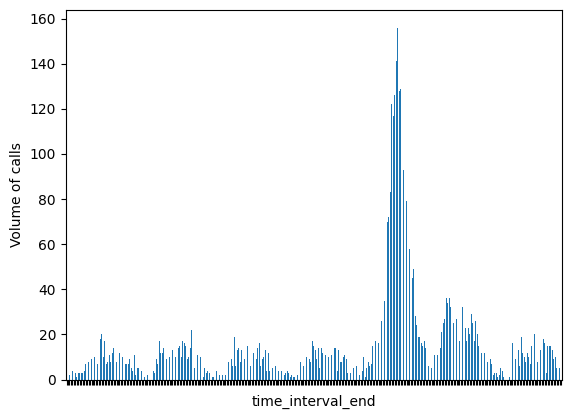

In [24]:
# create a set of all possible timestamps
intervals = pd.DataFrame(
    pd.date_range(
        start=week_data_aggregated["time_interval_start"].min(),
        end=week_data_aggregated["time_interval_end"].max(),
        freq="30min"
    ),
    columns=["time_interval_end"]
)

# join on our data based on time_interval_end (filna handles any missing time intervals)
intervals = intervals.merge(
    week_data_aggregated, on=["time_interval_end"], how="left"
)[["time_interval_end", "title"]].fillna(0)

ax = intervals.plot.bar(x="time_interval_end", y="title")
ax.set_xticklabels([])
ax.set_ylabel("Volume of calls")
ax.get_legend().remove()
ax.get_figure()

## Output to CSV 

Finally, we can create the required csv extract by first using the `tz_convert` function to convert our timestamps from US Eastern to UTC before using the `apply` method to convert these UTC timestamps to ISO format.

With the time conversion and formatting complete, we can simply use pandas `to_csv` method to save our selected columns to csv format.

In [8]:
example_data["timestamp_utc"] = example_data["timestamp_local"].dt.tz_convert(pytz.utc)
example_data["timestamp_iso"] = example_data["timestamp_utc"].apply(lambda x: x.isoformat())

output = example_data[["timestamp_iso", "title", "desc", "twp"]]
output.to_csv("sample_output.csv", index=False)
output.head()

,timestamp_iso,title,desc,twp
0,2015-12-10T22:10:52+00:00,EMS: BACK PAINS/INJURY,REINDEER CT & DEAD END; NEW HANOVER; Station ...,NEW HANOVER
1,2015-12-10T22:29:21+00:00,EMS: DIABETIC EMERGENCY,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,HATFIELD TOWNSHIP
2,2015-12-10T19:39:21+00:00,Fire: GAS-ODOR/LEAK,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,NORRISTOWN
3,2015-12-10T21:47:36+00:00,EMS: CARDIAC EMERGENCY,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,NORRISTOWN
4,2015-12-10T21:56:52+00:00,EMS: DIZZINESS,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,LOWER POTTSGROVE
